In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.set_printoptions(precision=5, suppress=True)
torch.set_printoptions(precision=5, sci_mode=False)

In [2]:
NN_dataset = pd.read_excel('[PyG] [14 bus] [MSE] NN test loss.xlsx').values
NN_testloss = NN_dataset[0][1:]

GNN_NN_dataset = pd.read_excel('[PyG] [14 bus] [MSE] GNN NN test loss.xlsx').values
GNN_NN_testloss = GNN_NN_dataset[0][1:]

GNN_GNN_NN_dataset = pd.read_excel('[PyG] [14 bus] [MSE] GNN GNN NN test loss.xlsx').values
GNN_GNN_NN_testloss = GNN_GNN_NN_dataset[0][1:]

NN_dataset_NRMSE = pd.read_excel('[PyG] [14 bus] [NRMSE] NN test loss.xlsx').values
NN_testloss_NRMSE = NN_dataset_NRMSE[0][1:]

GNN_NN_dataset_NRMSE = pd.read_excel('[PyG] [14 bus] [NRMSE] GNN NN test loss.xlsx').values
GNN_NN_testloss_NRMSE = GNN_NN_dataset_NRMSE[0][1:]

GNN_GNN_NN_dataset_NRMSE = pd.read_excel('[PyG] [14 bus] [NRMSE] GNN GNN NN test loss.xlsx').values
GNN_GNN_NN_testloss_NRMSE = GNN_GNN_NN_dataset_NRMSE[0][1:]

In [3]:
print("NN_testloss: \n" + str(NN_testloss))
print("\nGNN_NN_testloss: \n" + str(GNN_NN_testloss))
print("\nGNN_GNN_NN_NN_testloss: \n" + str(GNN_GNN_NN_testloss))

print("\nNN_testloss_NRMSE: \n" + str(NN_testloss_NRMSE))
print("\nGNN_NN_testloss_NRMSE: \n" + str(GNN_NN_testloss_NRMSE))
print("\nGNN_GNN_NN_NN_testloss_NRMSE: \n" + str(GNN_GNN_NN_testloss_NRMSE))

NN_testloss: 
[0.00007 0.00011 0.00023 0.00007 0.00011 0.00025 0.00012 0.00018 0.00011
 0.0004  0.00008 0.00008 0.00011 0.00007 0.00007 0.00012 0.0001  0.00031
 0.00021 0.00016 0.00009 0.00008 0.00011 0.0001  0.00022 0.0003  0.00009
 0.00014 0.00011 0.00008 0.00011 0.00007 0.00009 0.00011 0.00008 0.00011
 0.00017 0.00024 0.00012 0.00025 0.00007 0.00011 0.00009 0.00008 0.00012
 0.0001  0.00013 0.00015 0.00012 0.00016 0.00009 0.00009 0.00025 0.00025
 0.00012 0.00009 0.00014 0.00047 0.00012 0.00012 0.00006 0.00013 0.00015
 0.00017 0.00008 0.00013 0.0001  0.00013 0.00011 0.00013 0.00041 0.00017
 0.00021 0.00017 0.00009 0.00026 0.00014 0.00008 0.00014 0.00025 0.0001
 0.00009 0.0001  0.0001  0.00012 0.0001  0.00029 0.00014 0.00044 0.00014
 0.00015 0.00008 0.00014 0.00009 0.00023 0.00008 0.00014 0.00012 0.00024
 0.00015]

GNN_NN_testloss: 
[0.00007 0.00016 0.00011 0.00003 0.00012 0.00013 0.00008 0.00011 0.0001
 0.00024 0.00004 0.00009 0.00007 0.00005 0.00005 0.00013 0.0001  0.0002
 0.00011 0.

In [4]:
mean1 = np.mean(NN_testloss)
median1 = np.median(NN_testloss)

mean2 = np.mean(GNN_NN_testloss)
median2 = np.median(GNN_NN_testloss)

mean3 = np.mean(GNN_GNN_NN_testloss)
median3 = np.median(GNN_GNN_NN_testloss)

mean1_NRMSE = np.mean(NN_testloss_NRMSE)
median1_NRMSE = np.median(NN_testloss_NRMSE)

mean2_NRMSE = np.mean(GNN_NN_testloss_NRMSE)
median2_NRMSE = np.median(GNN_NN_testloss_NRMSE)

mean3_NRMSE = np.mean(GNN_GNN_NN_testloss_NRMSE)
median3_NRMSE = np.median(GNN_GNN_NN_testloss_NRMSE)

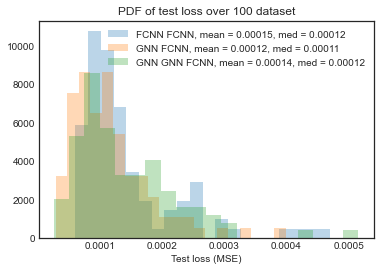

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=20)

label1 = "FCNN FCNN, mean = {:.5f}, med = {:.5f}".format(mean1, median1)
label2 = "GNN FCNN, mean = {:.5f}, med = {:.5f}".format(mean2, median2)
label3 = "GNN GNN FCNN, mean = {:.5f}, med = {:.5f}".format(mean3, median3)

plt.hist(NN_testloss, label=label1, **kwargs)
plt.hist(GNN_NN_testloss, label=label2, **kwargs)
plt.hist(GNN_GNN_NN_testloss, label=label3, **kwargs)

plt.title('PDF of test loss over 100 dataset')
plt.xlabel("Test loss (MSE)")
#plt.xlim([0, 100])
plt.ylabel("")
plt.legend(loc=1)
plt.show()

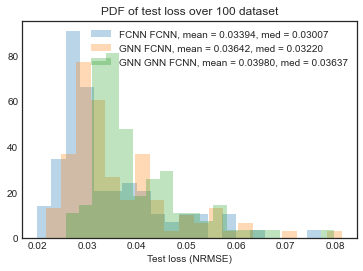

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=20)

label1 = "FCNN FCNN, mean = {:.5f}, med = {:.5f}".format(mean1_NRMSE, median1_NRMSE)
label2 = "GNN FCNN, mean = {:.5f}, med = {:.5f}".format(mean2_NRMSE, median2_NRMSE)
label3 = "GNN GNN FCNN, mean = {:.5f}, med = {:.5f}".format(mean3_NRMSE, median3_NRMSE)

plt.hist(NN_testloss_NRMSE, label=label1, **kwargs)
plt.hist(GNN_NN_testloss_NRMSE, label=label2, **kwargs)
plt.hist(GNN_GNN_NN_testloss_NRMSE, label=label3, **kwargs)

plt.title('PDF of test loss over 100 dataset')
plt.xlabel("Test loss (NRMSE)")
#plt.xlim([0, 2.2])
#plt.ylim([0, 80])
plt.ylabel("")
plt.legend(loc=1)
plt.show()